## Определение перспективного тарифа для телеком-компании

«Мегалайн» — федеральный оператор сотовой связи. Эта компания предлагает два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифа «Смарт»:**
- Ежемесячная плата: 550 рублей;
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля; 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Описание тарифа «Ультра»:**
- Ежемесячная плата: 1950 рублей;
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

⚠️ **Важное примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цель исследования** — тщательно проанализировать имеющиеся данные и проверить гипотезы, чтобы выяснить какой тариф лучше в плане прибыли.

**Ход исследования:**

Все необходимые данные получим из файлов `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv` и `users.csv`. Нам понадобится обзор данных для начала, так как сейчас нет информации об их качестве. Поискать и исправить ошибки, если они будут, а также привести данные к нужному типу, если понадобится. Также произвести расчеты параметров, которые нам понадобятся для анализа и проверки гипотез, что и будем делать после расчетов. В итоге придем к какому-то общему выводу, подытожив результат проекта. 
 
Таким образом, анализ пройдёт в пять шагов:
 1. Изучение данных из файла.
 2. Предобработка и подготовка данных.
 3. Анализ данных.
 4. Проверка гипотез. 
 5. Общий вывод.

Импортируем сразу же нужные библиотеки, затем в процессе добавим другие здесь же, если будет такая необходимость:

In [1]:
import pandas as pd
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st

### 1. Изучение данных из файла

Изучим общую информацию по каждой таблице. Для начала прочитаем все файлы из папки `/datasets` по очереди и сохраним таблицы в переменные:
- `users.csv` сохраним в `users`;
- `calls.csv` сохраним в `calls`;
- `messages.csv` сохраним в `messages`;
- `internet.csv` сохраним в `internet`;
- `tariffs.csv` сохраним в `tariffs`. 

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Выведем случайные десять строк каждой таблицы по очереди, чтобы взглянуть на данные впервые и сразу в разных местах. Для этого вызовем функцию `sample()`. За исключением таблицы `tariffs`, так как там информация лишь о двух тарифах. Затем сразу же познакомимся с данными при помощи вызова `info()`, изучим их. В том числе посмотрим типы данных, количество столбцов и примерно прикинем количество пропущенных значений, если они будут:

In [3]:
display(users.sample(10))
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
426,1426,56,NaN,Оренбург,Арина,Богданова,2018-09-04,smart
243,1243,74,NaN,Пермь,Артём,Леонтьев,2018-06-01,ultra
350,1350,40,NaN,Омск,Варвара,Козырева,2018-08-30,ultra
403,1403,18,NaN,Брянск,Ахмет,Амелин,2018-05-20,ultra
47,1047,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart
85,1085,69,NaN,Омск,Лола,Дорофеева,2018-06-12,ultra
359,1359,52,NaN,Москва,Константин,Абашкин,2018-07-27,smart
191,1191,64,2018-10-03,Набережные Челны,Александр,Акиндинов,2018-06-30,smart
305,1305,37,NaN,Москва,Эмилия,Лаптева,2018-10-25,smart
344,1344,60,NaN,Воронеж,Илзе,Игнатьева,2018-04-03,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Файл `users.csv` содержит данные с информацией о 500 пользователях. Всего в таблице 8 столбцов. Типы данных: `int` и `object`. Согласно документации к данным:
- `user_id` — уникальный идентификатор пользователя;
- `first_name` — имя пользователя;
- `last_name` — фамилия пользователя;
- `age` — возраст пользователя (годы);
- `reg_date` — дата подключения тарифа (день, месяц, год);
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
- `city` — город проживания пользователя;
- `tariff` — название тарифного плана.

In [4]:
display(calls.sample(10))
calls.info()

,id,call_date,duration,user_id
85186,1213_232,2018-08-26,0.00,1213
77465,1193_727,2018-07-01,15.50,1193
9111,1024_142,2018-11-19,12.26,1024
182725,1454_477,2018-12-28,7.76,1454
117600,1302_240,2018-09-07,0.00,1302
130245,1333_92,2018-10-24,3.15,1333
130512,1334_67,2018-12-13,0.00,1334
132443,1340_417,2018-05-30,0.00,1340
16153,1044_259,2018-06-29,10.64,1044
27348,1067_258,2018-05-02,7.76,1067


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Файл `calls.csv` содержит данные с информацией о 202 607 звонках. Всего в таблице 4 столбца. Типы данных: `float`, `int` и `object`. Согласно документации к данным:
- `id` — уникальный номер звонка;
- `call_date` — дата звонка;
- `duration` — длительность звонка в минутах;
- `user_id` — идентификатор пользователя, сделавшего звонок.

In [5]:
display(messages.sample(10))
messages.info()

,id,message_date,user_id
112134,1453_159,2018-09-12,1453
69191,1295_285,2018-10-24,1295
15807,1067_241,2018-08-30,1067
9285,1037_31,2018-12-14,1037
59930,1263_51,2018-05-22,1263
11614,1048_260,2018-11-03,1048
74795,1317_34,2018-12-10,1317
56610,1251_74,2018-06-24,1251
70698,1300_450,2018-08-20,1300
4890,1021_46,2018-10-15,1021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Файл `messages.csv` содержит данные с информацией о 123 036 сообщениях. Всего в таблице 3 столбца. Типы данных: `int` и `object`. Согласно документации к данным:
- `id` — уникальный номер сообщения;
- `message_date` — дата сообщения;
- `user_id` — идентификатор пользователя, отправившего сообщение.

In [6]:
display(internet.sample(10))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
145255,145255,1484_136,548.69,2018-08-07,1484
42891,42891,1148_479,413.28,2018-06-03,1148
41167,41167,1144_327,775.81,2018-06-10,1144
117263,117263,1394_221,88.15,2018-10-10,1394
142282,142282,1477_179,361.90,2018-12-22,1477
98763,98763,1331_287,1029.48,2018-07-15,1331
19280,19280,1065_425,0.00,2018-08-21,1065
45593,45593,1157_105,536.53,2018-09-12,1157
143413,143413,1480_101,5.58,2018-04-06,1480
128505,128505,1429_663,532.03,2018-11-30,1429


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Файл `internet.csv` содержит данные с информацией об 149 396 интернет-сессиях. Всего в таблице 5 столбцов. Типы данных: `float`, `int` и `object`. Согласно документации к данным:
- `id` — уникальный номер сессии;
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
- `session_date` — дата интернет-сессии;
- `user_id` — идентификатор пользователя.

In [7]:
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Файл `tariffs.csv` содержит данные с информацией о 2 тарифах. Всего в таблице 8 столбцов. Типы данных: `int` и `object`. Согласно документации к данным:
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Видим, что:
-  в таблице с **данными о пользователях** `users` есть пропуски в столбце `churn_date`, но документация гласит о том, что это связано с действием тарифа на момент выгрузки данных, поэтому пропуски можно будет игнорировать, да и для анализа этот столбец не нужен. В столбцах `churn_date` и `reg_date` неправильный тип данных, который нужно будет исправить;
- в таблице с **данными о звонках** `calls` нет пропусков. Тип данных в столбце `call_date` нужно заменить на `datetime`. В столбце `duration` есть нулевые звонки. Это не является ошибкой, так как нулями обозначены пропущенные звонки, их не будем удалять;
- в таблице с **данными о сообщениях** `messages` нет пропусков, но в столбце `message_date` нужно заменить тип данных на `datetime`;
- в таблице с **данными об интернет-сессиях** `internet` нет пропусков, но в столбце `mb_used` есть нулевые значения, а еще тип данных в столбце `session_date` нужно заменить на `datetime`. Есть странный столбец `Unnamed: 0` с нарушением стиля, дублирующий информацию по индексам и не несущий в себе никакой ценности, поэтому его можно будет удалить;
- в таблице с **данными о тарифах** `tariffs` нет пропусков, как ни странно, и в остальном все в порядке;
- в остальном в названиях колонок нет нарушений стиля, поэтому корректировать в них ничего не будем. Везде соблюден «змеиный_регистр» и название колонок соответствует их описанию по документации;
- необходимо в столбцах `duration` и `mb_used` округлить значения до целого в большую сторону, так как тариф учитывает целые минуты и мегабайты, затем изменить тип данных на `int`;
- после объединения таблиц по звонкам, сообщениям и интернет-трафику наверняка возникнут пропущенные значения, ведь клиент мог не использовать звонки, сообщения или интернет-трафик. Такие значения нужно будет заменить на нули.

**Вывод:**

В таблицах - различные данные по небольшой выборке клиентов, которые пользуются услугами федерального оператора сотовой связи «Мегалайн». В основном нам предоставлена информация о действиях клиентов, на которые мы и будем ориентироваться при анализе. 

Предварительно можем утверждать, что данных достаточно для проведения анализа и проверки гипотез, однако есть столбцы с некорректными типами данных и чуть чуть пропусков в одной таблице, причина которых нам известна. Есть лишний столбец, который не несет в себе никакой информации, а также некоторые значения еще не приведены к нужному формату с учетом особенностей работы тарифов.

Устраним все замеченные недочеты и проведем расчеты, после чего приступим к анализу данных и непосредственно к самой проверке гипотез. 

### 2. Предобработка и подготовка данных

Исправим все найденные ошибки в данных. Заменим тип данных на правильный в обозначенных ранее столбцах. Также произведем необходимые для анализа расчеты. 

#### 2.1 Исправление ошибок и замена типа данных

В первом шаге мы пояснили то, какие ошибки нашли и что с ними нужно сделать. В том же порядке будем все исправлять. 

По таблице `users`. В столбцах `churn_date` и `reg_date` заменим тип данных на `datetime`:

In [8]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

По таблице `calls`. В столбце `call_date` заменим тип данных на `datetime`:

In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

По таблице `messages`. В столбце `message_date` заменим тип данных на `datetime`:

In [10]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

По таблице `internet`. В столбце `session_date` заменим тип данных на `datetime`. Также удалим нулевые значения в столбце `mb_used`, так как они никакой роли на финансовый результат не окажут. Еще удалим столбец `Unnamed: 0`:

In [11]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet.drop(internet[internet['mb_used'] == 0].index, inplace = True)
internet = internet.drop('Unnamed: 0', axis=1)

Теперь в столбцах `duration` и `mb_used` округлим значения до целого в большую сторону, так как тариф учитывает целые минуты и мегабайты, затем изменим тип данных на `int`:

**Вывод:**

В данных было не очень много ошибок, но они повлияли бы на сам анализ, поэтому мы привели их в порядок. Убрали лишний столбец, заменили типы данных и удалили нулевые значения, которые не влияют на финансовый результат. 

#### 2.2 Расчеты и объединение таблиц

Теперь займемся расчетами и объединением таблиц.

**1.** Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. Сначала добавим новый столбец с месяцами по звонкам:

In [13]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Посчитаем количество израсходованных минут разговора по месяцам у каждого пользователя:

In [14]:
calls_month_sum = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum').reset_index()
calls_month_sum

,user_id,month,duration
0,1000,5,150.06
1,1000,6,158.90
2,1000,7,318.80
3,1000,8,389.87
4,1000,9,440.14
...,...,...,...
3169,1498,10,232.63
3170,1499,9,64.65
3171,1499,10,429.91
3172,1499,11,576.50


Посчитаем количество сделанных звонков у каждого пользователя:

In [15]:
calls_month_count = calls.groupby(['user_id', 'month'])[['id']].agg(['count']).reset_index()
calls_month_count.columns = ['user_id', 'month', 'calls_count']
calls_month_count

,user_id,month,calls_count
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
...,...,...,...
3169,1498,10,41
3170,1499,9,9
3171,1499,10,68
3172,1499,11,74


Объединим две созданные таблицы:

In [16]:
calls_month = calls_month_count.merge(calls_month_sum, how = 'left', on = ['user_id', 'month'])
calls_month

,user_id,month,calls_count,duration
0,1000,5,22,150.06
1,1000,6,43,158.90
2,1000,7,47,318.80
3,1000,8,52,389.87
4,1000,9,58,440.14
...,...,...,...,...
3169,1498,10,41,232.63
3170,1499,9,9,64.65
3171,1499,10,68,429.91
3172,1499,11,74,576.50


**2.** Посчитаем количество отправленных сообщений по месяцам. Сначала добавим новый столбец с месяцами по сообщениям:

In [17]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Посчитаем количество отправленных сообщений по месяцам у каждого пользователя:

In [18]:
messages_month_count = messages.groupby(['user_id', 'month'])[['id']].agg(['count']).reset_index()
messages_month_count.columns = ['user_id', 'month', 'messages_count']
messages_month_count

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


**3.** Посчитаем объем израсходованного интернет-трафика по месяцам. Сначала добавим новый столбец с месяцами:

In [19]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Посчитаем объем израсходованного интернет-трафика по месяцам:

In [20]:
internet_month = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
internet_month

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3196,1498,10,20579.36
3197,1499,9,1845.75
3198,1499,10,17788.51
3199,1499,11,17963.31


Необходимо добавить столбец с гигабайтами, так как для веб-трафика отдельные сессии не считаются, вместо этого общая сумма за месяц округляется в бо́льшую сторону. Столбец с мегабайтами уберем, так как он не понадобится:

In [21]:
internet_month['gb_used'] = (internet_month['mb_used'] / 1024).apply(math.ceil)
internet_month = internet_month.drop('mb_used', axis = 1)
internet_month

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3196,1498,10,21
3197,1499,9,2
3198,1499,10,18
3199,1499,11,18


**4.** Посчитаем помесячную выручку с каждого пользователя. Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика. Остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану. Сначала создадим таблицу, в которую будем добавлять все необходимые данные:

In [22]:
proceeds = users[['user_id', 'tariff']].copy()
rate = []
for tariff in proceeds['tariff']:
    if tariff == 'smart':
        rate.append(tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_monthly_fee'].values[0])
    else:
        rate.append(tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_monthly_fee'].values[0])
proceeds['monthly_fee'] = rate
proceeds

,user_id,tariff,monthly_fee
0,1000,ultra,1950
1,1001,smart,550
2,1002,smart,550
3,1003,ultra,1950
4,1004,ultra,1950
...,...,...,...
495,1495,ultra,1950
496,1496,smart,550
497,1497,smart,550
498,1498,smart,550


Соберем данные по ранее сделанным расчетам вместе:

In [23]:
all_calculations = calls_month_sum[['user_id', 'month', 'duration']]
for df in [messages_month_count, internet_month]:
    all_calculations = all_calculations.merge(df, how = 'outer', on = ['user_id', 'month'])
all_calculations

,user_id,month,duration,messages_count,gb_used
0,1000,5,150.06,22.0,3.0
1,1000,6,158.90,60.0,23.0
2,1000,7,318.80,75.0,14.0
3,1000,8,389.87,81.0,14.0
4,1000,9,440.14,57.0,15.0
...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0
3210,1489,10,NaN,21.0,20.0
3211,1489,11,NaN,20.0,18.0
3212,1489,12,NaN,35.0,17.0


После объединения образовались пропущенные значения. Заменим их на нули:

In [24]:
all_calculations.fillna(0, inplace = True)
all_calculations.sample(10)

,user_id,month,duration,messages_count,gb_used
518,1082,11,101.69,72.0,17.0
772,1123,4,555.16,19.0,17.0
1316,1208,9,553.18,0.0,21.0
231,1036,7,268.97,1.0,9.0
1466,1233,12,631.83,27.0,20.0
52,1006,12,356.53,0.0,19.0
549,1088,6,288.86,33.0,11.0
2678,1423,1,57.67,8.0,2.0
2384,1379,11,1019.79,99.0,40.0
567,1090,10,480.06,14.0,14.0


Объединим оставшееся:

In [25]:
proceeds = proceeds.merge(all_calculations, how = 'right', on = ['user_id'])
proceeds['duration'] = proceeds['duration'].apply(np.ceil).astype('int64') #добавил округление после окончательной группировки
proceeds

,user_id,tariff,monthly_fee,month,duration,messages_count,gb_used
0,1000,ultra,1950,5,151,22.0,3.0
1,1000,ultra,1950,6,159,60.0,23.0
2,1000,ultra,1950,7,319,75.0,14.0
3,1000,ultra,1950,8,390,81.0,14.0
4,1000,ultra,1950,9,441,57.0,15.0
...,...,...,...,...,...,...,...
3209,1498,smart,550,10,233,42.0,21.0
3210,1499,smart,550,9,65,11.0,2.0
3211,1499,smart,550,10,430,48.0,18.0
3212,1499,smart,550,11,577,59.0,18.0


Рассчитаем переплату за минуты, сообщения и гигабайты, когда пользователь вышел за лимит, входящий в абонентскую плату, добавив новые столбцы с этими расчетами. 

По минутам:

In [26]:
def add_duration_fee(row):
    duration = row['duration']
    tariff = row['tariff']
    free_mins_smart = tariffs.loc[tariffs['tariff_name'] == 'smart', 'minutes_included'].values[0]
    free_mins_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'minutes_included'].values[0]
    fix_mins_smart = tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_minute'].values[0]
    fix_mins_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_minute'].values[0]
    add_duration_fee = 0
    if row['tariff'] == 'smart':
        add_duration_fee = max(duration - free_mins_smart, 0) * fix_mins_smart
        return add_duration_fee
    else:
        add_duration_fee = max(duration - free_mins_ultra, 0) * fix_mins_ultra
        return add_duration_fee

proceeds['add_duration_fee'] = proceeds.apply(add_duration_fee, axis = 1)
proceeds.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_count,gb_used,add_duration_fee
332,1054,smart,550,4,532,54.0,17.0,96
3080,1477,smart,550,11,494,71.0,28.0,0
746,1117,smart,550,12,270,0.0,12.0,0
3183,1494,smart,550,10,331,0.0,18.0,0
2746,1427,smart,550,9,529,12.0,14.0,87
804,1125,smart,550,11,372,7.0,15.0,0
2559,1400,smart,550,8,188,9.0,8.0,0
1631,1257,ultra,1950,8,0,157.0,25.0,0
1001,1157,smart,550,9,512,0.0,20.0,36
2398,1378,smart,550,1,216,6.0,5.0,0


По сообщениям:

In [27]:
def add_messages_fee(row):
    messages_count = row['messages_count']
    tariff = row['tariff']
    free_messages_smart = tariffs.loc[tariffs['tariff_name'] == 'smart', 'messages_included'].values[0]
    free_messages_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'messages_included'].values[0]
    fix_messages_smart = tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_message'].values[0]
    fix_messages_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_message'].values[0]
    add_messages_fee = 0
    if row['tariff'] == 'smart':
        add_messages_fee = max(messages_count - free_messages_smart, 0) * fix_messages_smart
        return add_messages_fee
    else:
        add_messages_fee=max(messages_count - free_messages_ultra, 0) * fix_messages_ultra
        return add_messages_fee

proceeds['add_messages_fee'] = proceeds.apply(add_messages_fee, axis = 1)
proceeds.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_count,gb_used,add_duration_fee,add_messages_fee
2093,1330,ultra,1950,7,620,76.0,28.0,0,0.0
1650,1262,smart,550,5,398,50.0,23.0,0,0.0
1892,1298,smart,550,12,597,38.0,26.0,291,0.0
1817,1286,smart,550,11,43,12.0,5.0,0,0.0
1051,1167,ultra,1950,9,32,12.0,2.0,0,0.0
407,1064,smart,550,9,455,33.0,14.0,0,0.0
2723,1424,ultra,1950,10,27,106.0,30.0,0,0.0
1897,1299,smart,550,5,497,40.0,16.0,0,0.0
2609,1407,smart,550,10,377,38.0,15.0,0,0.0
530,1085,ultra,1950,6,91,0.0,9.0,0,0.0


По гигабайтам:

In [28]:
def add_gb_fee(row):
    traffic = row['gb_used']
    tariff = row['tariff']
    free_gb_smart = tariffs.loc[tariffs['tariff_name'] == 'smart', 'mb_per_month_included'].values[0] / 1024
    free_gb_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'].values[0] / 1024
    fix_gb_smart = tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_gb'].values[0]
    fix_gb_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_gb'].values[0]
    add_gb_fee = 0
    if row['tariff'] == 'smart':
        add_gb_fee = max(traffic - free_gb_smart, 0) * fix_gb_smart
        return add_gb_fee
    else:
        add_gb_fee = max(traffic - free_gb_ultra, 0) * fix_gb_ultra
        return add_gb_fee

proceeds['add_gb_fee'] = proceeds.apply(add_gb_fee, axis = 1)
proceeds.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_count,gb_used,add_duration_fee,add_messages_fee,add_gb_fee
968,1152,ultra,1950,11,396,0.0,22.0,0,0.0,0.0
1788,1282,smart,550,9,790,67.0,20.0,870,51.0,1000.0
1005,1158,smart,550,2,353,55.0,13.0,0,15.0,0.0
98,1013,ultra,1950,11,350,17.0,10.0,0,0.0,0.0
614,1097,ultra,1950,10,611,38.0,9.0,0,0.0,0.0
2079,1327,smart,550,10,285,51.0,17.0,0,3.0,400.0
1884,1296,smart,550,11,252,40.0,16.0,0,0.0,200.0
1314,1204,smart,550,10,310,0.0,23.0,0,0.0,1600.0
541,1086,smart,550,8,533,43.0,16.0,99,0.0,200.0
1217,1188,smart,550,12,44,8.0,7.0,0,0.0,0.0


По всем новым столбцам видим, что сумма ровно та, которую клиент должен был переплатить за перерасход положенного по тарифу. Теперь посчитаем помесячную выручку с каждого пользователя, с учетом помесячной оплаты:

In [29]:
proceeds['total_fee'] = proceeds['monthly_fee'] + proceeds['add_duration_fee'] + proceeds['add_messages_fee'] + proceeds['add_gb_fee']
proceeds.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_count,gb_used,add_duration_fee,add_messages_fee,add_gb_fee,total_fee
7,1000,ultra,1950,12,313,70.0,10.0,0,0.0,0.0,1950.0
568,1090,ultra,1950,11,561,28.0,22.0,0,0.0,0.0,1950.0
931,1147,smart,550,11,250,36.0,20.0,0,0.0,1000.0,1550.0
0,1000,ultra,1950,5,151,22.0,3.0,0,0.0,0.0,1950.0
2409,1378,smart,550,12,530,7.0,14.0,90,0.0,0.0,640.0
3129,1483,smart,550,9,606,57.0,23.0,318,21.0,1600.0,2489.0
1866,1294,ultra,1950,4,193,18.0,21.0,0,0.0,0.0,1950.0
1276,1199,smart,550,12,837,66.0,11.0,1011,48.0,0.0,1609.0
1405,1219,smart,550,12,423,8.0,17.0,0,0.0,400.0,950.0
720,1113,smart,550,8,617,42.0,11.0,351,0.0,0.0,901.0


**Вывод:**

Мы произвели необходимые расчеты, затем использовали их для того, чтобы подсчитать переплату клиентов за превышение лимита, предусмотренного по тарифному плану. В итоге это помогло нам объединить переплату с ежемесячной платой по тарифу, чтобы узнать общие затраты клиентов. 

**Общий вывод:**

Как и планировали, исправили все найденные нами ошибки, а также заменили типы данных на правильные и удалили нулевые значения. Затем занялись расчетами и объединением таблиц, что поможет при дальнейшем анализе и проверке гипотез. 

### 3. Анализ данных

Начнем анализ данных. Опишем поведение клиентов оператора, исходя из выборки. Выясним, сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения. 

#### 3.1 Ежемесячное потребление пользователей

Посчитаем среднее количество минут, сообщений и интернет-трафика для каждого тарифа в месяц:


In [30]:
smart = proceeds.query('tariff == "smart"')
ultra = proceeds.query('tariff == "ultra"')
print('Среднее количество минут разговора на тарифе «Смарт» в месяц - {:.0f}'.format(smart['duration'].sum() / 12),
      ', на тарифе «Ультра» - {:.0f}'.format(ultra['duration'].sum() / 12))
print('Среднее количество сообщений на тарифе «Смарт» в месяц - {:.0f}'.format(smart['messages_count'].sum() / 12),
      ', на тарифе «Ультра» - {:.0f}'.format(ultra['messages_count'].sum() / 12))
print('Средний объем интернет-трафика на тарифе «Смарт» в месяц - {:.0f}'.format(smart['gb_used'].sum() / 12),
      ', на тарифе «Ультра» - {:.0f}'.format(ultra['gb_used'].sum() / 12))

Среднее количество минут разговора на тарифе «Смарт» в месяц - 73357 , на тарифе «Ультра» - 40840
Среднее количество сообщений на тарифе «Смарт» в месяц - 6201 , на тарифе «Ультра» - 4052
Средний объем интернет-трафика на тарифе «Смарт» в месяц - 3033 , на тарифе «Ультра» - 1600


**Вывод:**

По расчетам видно, что пользователи на тарифе «Смарт» используют больше минут, сообщений и гигабайт, по сравнению со вторым тарифом. 

#### 3.2 Среднее количество, дисперсия и стандартное отклонение

Посчитаем среднее количество, дисперсию и стандартное отклонение по каждому тарифу:

In [31]:
indicators = proceeds.groupby(['tariff']).agg({'total_fee' : ['mean', lambda x: np.var(x, ddof = 1),
                                                              lambda x: np.std(x, ddof = 1)]}).reset_index().round(2)
indicators.set_axis(['tariff', 'total_fee', 'variance', 'std_deviation'], axis = 'columns', inplace = True)
indicators

,tariff,total_fee,variance,std_deviation
0,smart,1257.59,641465.80,800.92
1,ultra,2070.15,141516.75,376.19


Построим диаграммы размаха для каждого тарифа горизонтально, чтобы видеть значения в нижней части:

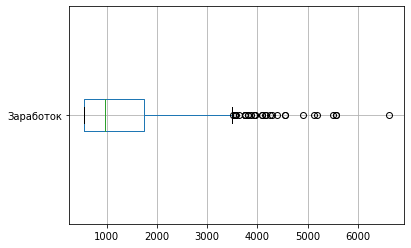

In [32]:
ax = smart[['total_fee']].boxplot(vert = False)
ax.set_yticklabels(['Заработок'])
plt.show()

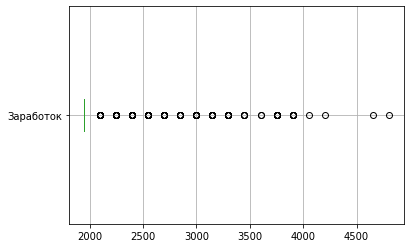

In [33]:
ax = ultra[['total_fee']].boxplot(vert = False)
ax.set_yticklabels(['Заработок'])
plt.show()

Рассчитаем максимальные значения с применением правил трёх сигм для обоих тарифов. Все свыше будем считать выбросами и избавимся от них. 

In [34]:
indicators_smart = smart[['total_fee']].describe().T
q1_smart, q2_smart = indicators_smart['25%'][0], indicators_smart['75%'][0]
iqr_smart = q2_smart - q1_smart
max_value_smart = q2_smart + 3 * iqr_smart
max_value_smart

5282.0

In [35]:
indicators_smart

,count,mean,std,min,25%,50%,75%,max
total_fee,2229.0,1257.588605,800.915599,550.0,550.0,962.0,1733.0,6614.0


In [36]:
indicators_ultra = ultra[['total_fee']].describe().T
q1_ultra, q2_ultra = indicators_ultra['25%'][0], indicators_ultra['75%'][0]
iqr_ultra = q2_ultra - q1_ultra
max_value_ultra = q2_ultra + 3 * iqr_ultra
max_value_ultra

1950.0

In [37]:
indicators_ultra

,count,mean,std,min,25%,50%,75%,max
total_fee,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0


**Вывод:**

Мы посчитали среднее количество, дисперсию и стандартное отклонение по каждому тарифу, построили диаграммы размаха и рассчитали максимальные значения с применением правил трёх сигм. 

#### 3.3 Гистограммы

Построим гистограммы по звонкам, сообщениям и интернет-трафику.

По звонкам:

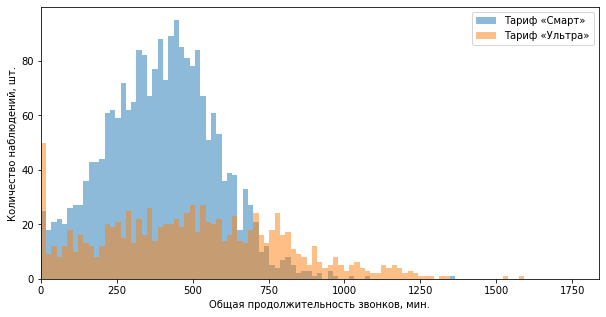

In [38]:
plt.figure(figsize = (10,5))
plt.hist(proceeds.query('tariff == "smart"')['duration'], bins = 100, alpha = 0.5, label = 'Тариф «Смарт»', range = (0, 1750))
plt.hist(proceeds.query('tariff == "ultra"')['duration'], bins = 100, alpha = 0.5, label = 'Тариф «Ультра»', range = (0, 1750))
plt.legend(loc = 'best')
plt.xlim(left = 0)
plt.xlabel('Общая продолжительность звонков, мин.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Пиковые значения на нулях - это несостоявшиеся звонки, о которых говорили ранее, их учитывать не будем. Пик на тарифе «Смарт» в районе 580 минут, а на тарифе «Ультра» в районе 520 минут. В основном клиенты тратят на звонки от 200 до 700 минут. В обоих случаях есть большие хвосты вправо, что говорит о том, что основной объем минут находится в левой части, то есть с более низкими значениями.

По сообщениям:

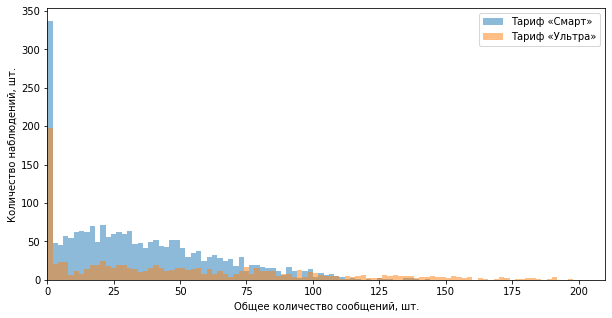

In [39]:
fig = plt.figure(figsize = (10,5))
plt.hist(proceeds.query('tariff == "smart"')
         ['messages_count'], bins = 100, alpha = 0.5, label = 'Тариф «Смарт»', range = (0, 200))
plt.hist(proceeds.query('tariff == "ultra"')
         ['messages_count'], bins = 100, alpha = 0.5, label = 'Тариф «Ультра»', range = (0, 200))
plt.legend(loc = 'best')
plt.xlim(left = 0)
plt.xlabel('Общее количество сообщений, шт.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Пиковые значения на нулях обозначают отсутствие отправленных сообщений клиентами, поэтому их не учитываем. Большая часть клиентов отправляет менее 100 сообщений в месяц. В обоих случаях есть большие хвосты вправо, что говорит о том, что основной объем отправленных сообщений находится в левой части, то есть с более низкими значениями.

По интернет-трафику:

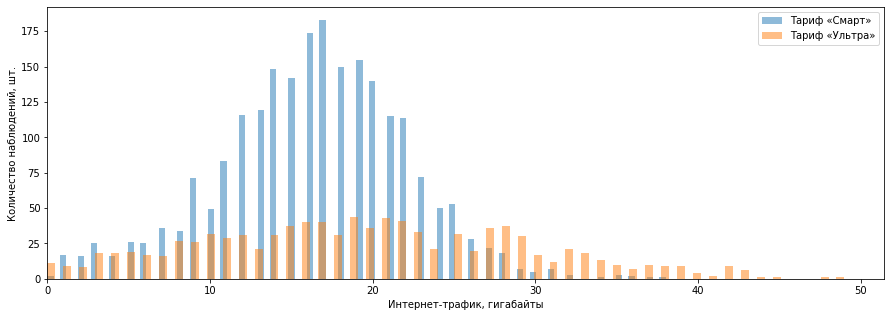

In [40]:
fig = plt.figure(figsize = (15,5))
plt.hist(proceeds.query('tariff == "smart"')['gb_used'], bins = 100, alpha = 0.5, label = 'Тариф «Смарт»')
plt.hist(proceeds.query('tariff == "ultra"')['gb_used'], bins = 100, alpha = 0.5, label = 'Тариф «Ультра»')
plt.legend(loc = 'best')
plt.xlim(left = 0)
plt.xlabel('Интернет-трафик, гигабайты')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

В этот раз нулевых значений мало. По тарифу «Смарт» пиковое значение на 17 гигабайтах, а по тарифу «Ультра» на 19 гигабайтах. Также заметно, что график интернет-трафика имеет нормальное распределение с минимальным количеством выбросов.

**Вывод:**

Мы построили гистограммы по нужным параметрам и описали распределения. В последнем случае у нас получилась гистограмма с нормальным распределением. 

**Общий вывод:**

В этом шаге мы проанализировали данные. Описали поведение клиентов оператора, исходя из выборки. Выяснили, сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение, а также построили гистограммы и описали распределения. Во всех случаях подтвердилось то, что на тарифе «Смарт» пользователи будто более активные. 

### 4. Проверка гипотез

Проверим гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение `alpha` зададим самостоятельно.

#### 4.1 Проверка гипотезы: cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Формируем гипотезы:
- H0 — cредняя выручка пользователей тарифов «Ультра» и «Смарт» равна;
- H1 — cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

α = 1%

In [41]:
alpha = 0.01 
results = st.ttest_ind(smart['total_fee'], ultra['total_fee'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.513773301175091e-178
Отвергаем нулевую гипотезу


**Вывод:**

Нулевая гипотеза не подтвердилась. Средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различается. 

#### 4.2 Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Формируем гипотезы:
- H0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
- H1 — средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

α = 1%

Добавим столбец с городами в нашу основную таблицу:

In [42]:
proceeds = proceeds.merge(users[['user_id', 'city']], on = 'user_id', how = 'left')

Теперь сделаем срезы по нужным значениям и затем сразу проверим гипотезу:

In [43]:
moscow_customer = proceeds.query('city == "Москва"')['total_fee']
regions_customer = proceeds.query('city != "Москва"')['total_fee']

In [44]:
alpha = 0.01 
results = st.ttest_ind(moscow_customer, regions_customer)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4836504757759247
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Не получилось отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы не отличается от выручки из других регионов. 

**Общий вывод:**

Мы проверили обе гипотезы. Выяснили, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а вот средняя выручка пользователей из Москвы не отличается от выручки из других регионов.

### 5. Общий вывод

**Вывод:**

Мы провели объемную работу с полученными файлами и ознакомились с данными в нем. Затем двигались по следующему пути:
- нашли и исправили ошибки в данных, а также заменили типы данных на правильные;
- посчитали и добавили в таблицу количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам и помесячную выручку с каждого пользователя;
- проанализировали данные, описав поведение клиентов оператора, исходя из выборки. Узнали сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение. Построили гистограммы;
- в заключении проверили две гипотезы.

Можем подытожить следующим:
- если посмотреть на гистограмму, то малое количество пользователей тарифа «Ультра» используют весь лимит гигабайт, а минут и сообщений в принципе никто по максимуму не использует;
- у пользователей тарифа «Смарт» наоборот по всем показателям есть превышение лимита по тарифу, поэтому они переплачивают еще сверху;
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы не отличается от выручки из других регионов;
- самым популярным оказался тариф «Смарт», но самым прибыльным тариф «Ультра», поэтому именно его нужно продвигать менеджерам.